In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.api import qqplot,add_constant
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rc('font',family='NanumGothic')
df=pd.read_csv('체질검사.csv',engine='python',encoding='949')

In [2]:
weight=pd.DataFrame(df['WEIGHT']*0.45)
height=pd.DataFrame(df['WEIGHT']*2.54/100)
df.insert(4,'BMI',(weight/(height*height)).round(2),True)

#bmi 파생변수 생성

In [3]:
df.head()

,FAT,AGE,WEIGHT,HEIGHT,BMI,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,1.92,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,4.15,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,3.92,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,4.72,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,3.18,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [4]:
df.corr()

#weight와 bmi, neck,chest,abdomen,hip,thigh 간의 상관관계가 보여진다.
#그 외에도 chest와 neck,abdomen 등 다른 변수들에서도 상관관계가 다수 보인다.

,FAT,AGE,WEIGHT,HEIGHT,BMI,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000000,0.291458,0.612414,-0.089495,-0.631387,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
AGE,0.291458,1.000000,-0.012746,-0.171645,0.007846,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
WEIGHT,0.612414,-0.012746,1.000000,0.308279,-0.964291,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
HEIGHT,-0.089495,-0.171645,0.308279,1.000000,-0.330742,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
BMI,-0.631387,0.007846,-0.964291,-0.330742,1.000000,-0.806203,-0.878447,-0.863439,-0.898539,-0.849374,-0.849760,-0.605395,-0.791713,-0.674167,-0.733083
NECK,0.490592,0.113505,0.830716,0.253710,-0.806203,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
CHEST,0.702620,0.176450,0.894191,0.134892,-0.878447,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
ABDOMEN,0.813432,0.230409,0.887995,0.087813,-0.863439,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
HIP,0.625201,-0.050332,0.940884,0.170394,-0.898539,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
THIGH,0.559608,-0.200096,0.868694,0.148436,-0.849374,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


In [5]:
df_x=df.drop('FAT',axis=1)
df_x_const=add_constant(df_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_x_const.values,i)for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF',inplace=True)
df_vif.round(3)

#다중공선성 확인 결과 ABDOMEN, HIP, BMI, WEIGHT 의 VIF가 높다.

,variable,VIF
3,HEIGHT,1.755
11,ANKLE,1.909
1,AGE,2.254
13,FOREARM,2.367
14,WRIST,3.413
12,BICEPS,3.620
5,NECK,4.355
10,KNEE,4.747
9,THIGH,7.950
6,CHEST,9.714


In [6]:
reg_model=smf.ols(formula='FAT~AGE+WEIGHT+HEIGHT+ BMI+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE\
+ANKLE+BICEPS+FOREARM+WRIST',data=df)
reg_result=reg_model.fit()
print(reg_result.summary())

#전체 변수를 넣고 다중회귀분석을 한 결과 p값이 0.05보다 작으므로 유의함.
#R-squared가 0.762로 다음 회귀식의 설명력인 높음.


                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     54.27
Date:                Thu, 02 May 2019   Prob (F-statistic):           1.08e-65
Time:                        20:38:24   Log-Likelihood:                -711.45
No. Observations:                 252   AIC:                             1453.
Df Residuals:                     237   BIC:                             1506.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.0839     25.525      2.001      0.0

In [7]:
df_x=df.drop(['FAT'],axis=1)
df_y=df['FAT']
model=LinearRegression()
rfe=RFE(estimator=model,n_features_to_select=5).fit(df_x,df_y)
selected_cols=df_x.columns[rfe.support_]
removed_cols=df_x.columns[~rfe.support_]
print('selected variable : {}'.format(selected_cols))
print('removed variable : {}'.format(removed_cols))

#후진제거법을 통해 'BMI', 'NECK', 'ABDOMEN', 'BICEPS', 'WRIST' 변수를 선택함.

selected variable : Index(['BMI', 'NECK', 'ABDOMEN', 'BICEPS', 'WRIST'], dtype='object')
removed variable : Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'ANKLE',
       'FOREARM'],
      dtype='object')


In [8]:
reg_model=smf.ols(formula='FAT~ BMI+NECK+ABDOMEN+BICEPS+WRIST',data=df)
reg_result=reg_model.fit()
print(reg_result.summary())

#다중공선성이 높은 변수를 제거하고 회귀식을 구현함.
#회귀식의 결과 p값이 0.05보다 작으므로 다음 회귀식은 유의함.
#R-squared 값이 0.712므로 모델 설명력이 높음.

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     121.6
Date:                Thu, 02 May 2019   Prob (F-statistic):           2.09e-64
Time:                        20:38:25   Log-Likelihood:                -735.64
No. Observations:                 252   AIC:                             1483.
Df Residuals:                     246   BIC:                             1504.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.0492     15.118     -1.128      0.2

In [9]:
df_x=df.drop(['FAT','AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'ANKLE',
       'FOREARM'],axis=1)
df_x_const=add_constant(df_x)
df_vif=pd.DataFrame()
df_vif['variable']=df_x_const.columns
df_vif['VIF']=[variance_inflation_factor(df_x_const.values,i)for i in range(df_x_const.shape[1])]
df_vif.sort_values('VIF',inplace=True)
df_vif.round(3)

#후진제거법을 통해 다중공선성이 높은 변수를 제거하고 다시 다중선성을 분석함
#분석 결과 변수들 간의 관계가 적음.

,variable,VIF
5,WRIST,2.573
4,BICEPS,2.877
2,NECK,3.727
3,ABDOMEN,4.156
1,BMI,6.725
0,const,2797.891


                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     121.6
Date:                Thu, 02 May 2019   Prob (F-statistic):           2.09e-64
Time:                        20:38:26   Log-Likelihood:                -735.64
No. Observations:                 252   AIC:                             1483.
Df Residuals:                     246   BIC:                             1504.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1508      0.286     67.003      0.0

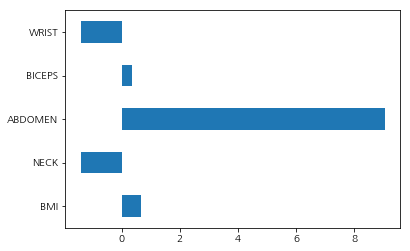

In [10]:
scaler=StandardScaler()
cols=df_x.columns
np_scaled=scaler.fit_transform(df_x)
df_scaled=pd.DataFrame(np_scaled,columns=cols)
df_scaled['FAT']=df['FAT']
reg_model_scaled=smf.ols(formula='FAT~ BMI+NECK+ABDOMEN+BICEPS+WRIST',data=df_scaled)
reg_result_scaled=reg_model_scaled.fit()
print(reg_result_scaled.summary())

df_reg_coef=pd.DataFrame({'Coef':reg_result_scaled.params.values[1:]},index=selected_cols)
df_reg_coef.plot.barh(y='Coef',legend=False)


#scale 과정 후 변수간의 중요도를 분석함
#fat에 가장 영향을 많이 주는 변수는 ABDOMEN 이며 가장 적은 영향을 주는 변수는  BICEPS 이다.